In [1]:
import pandas as pd

In [2]:
import yfinance as yf

In [3]:
tsla = yf.Ticker('TSLA')

In [4]:
tsla = tsla.history(period = 'max')

In [5]:
tsla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-29 00:00:00-05:00,255.100006,255.190002,247.429993,248.479996,100615300,0.0,0.0
2024-01-02 00:00:00-05:00,250.080002,251.250000,244.410004,248.419998,104654200,0.0,0.0
2024-01-03 00:00:00-05:00,244.979996,245.679993,236.320007,238.449997,121082600,0.0,0.0


In [6]:
tsla.index

DatetimeIndex(['2010-06-29 00:00:00-04:00', '2010-06-30 00:00:00-04:00',
               '2010-07-01 00:00:00-04:00', '2010-07-02 00:00:00-04:00',
               '2010-07-06 00:00:00-04:00', '2010-07-07 00:00:00-04:00',
               '2010-07-08 00:00:00-04:00', '2010-07-09 00:00:00-04:00',
               '2010-07-12 00:00:00-04:00', '2010-07-13 00:00:00-04:00',
               ...
               '2023-12-21 00:00:00-05:00', '2023-12-22 00:00:00-05:00',
               '2023-12-26 00:00:00-05:00', '2023-12-27 00:00:00-05:00',
               '2023-12-28 00:00:00-05:00', '2023-12-29 00:00:00-05:00',
               '2024-01-02 00:00:00-05:00', '2024-01-03 00:00:00-05:00',
               '2024-01-04 00:00:00-05:00', '2024-01-05 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=3404, freq=None)

## Cleaning and visualization

<Axes: xlabel='Date'>

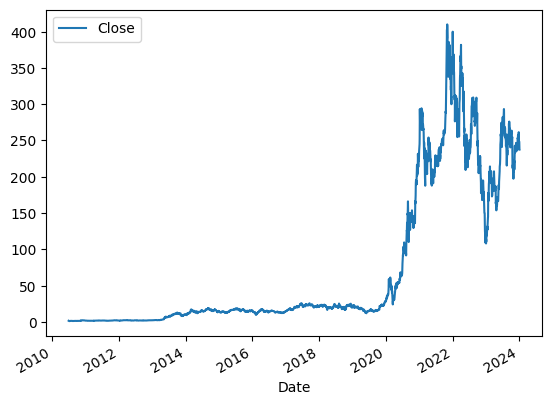

In [7]:
tsla.plot.line(y='Close', use_index = True)

In [8]:
# drop/delete unnecessary columns
tsla = tsla.drop(columns = ['Stock Splits'], axis = 1) 
del tsla['Dividends']

In [9]:
tsla

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
2023-12-29 00:00:00-05:00,255.100006,255.190002,247.429993,248.479996,100615300
2024-01-02 00:00:00-05:00,250.080002,251.250000,244.410004,248.419998,104654200
2024-01-03 00:00:00-05:00,244.979996,245.679993,236.320007,238.449997,121082600


## Setting up targer for ML

In [10]:
# insert new 'tomorrow column' by shift(-1) of 'close column'

In [11]:
tsla['Tomorrow'] = tsla['Close'].shift(-1)

In [12]:
tsla

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333
...,...,...,...,...,...,...
2023-12-29 00:00:00-05:00,255.100006,255.190002,247.429993,248.479996,100615300,248.419998
2024-01-02 00:00:00-05:00,250.080002,251.250000,244.410004,248.419998,104654200,238.449997
2024-01-03 00:00:00-05:00,244.979996,245.679993,236.320007,238.449997,121082600,237.929993


In [13]:
# add target column 
tsla['Target'] = (tsla['Tomorrow'] > tsla['Close']).astype(int)

In [14]:
tsla

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667,0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000,0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000,0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000,0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333,0
...,...,...,...,...,...,...,...
2023-12-29 00:00:00-05:00,255.100006,255.190002,247.429993,248.479996,100615300,248.419998,0
2024-01-02 00:00:00-05:00,250.080002,251.250000,244.410004,248.419998,104654200,238.449997,0
2024-01-03 00:00:00-05:00,244.979996,245.679993,236.320007,238.449997,121082600,237.929993,0


In [15]:
# collect the recent data (2013 - )
tsla = tsla.loc["2013-01-01":].copy()

## Default model - RandomForest

In [16]:
from sklearn.ensemble import RandomForestClassifier 
# harder to overfit, run relatively quickly, can pick up non-linear tendencies


model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)
# n_estimators: # of decision trees
# min_samples_split: min # of samples required to split, greater # = less likely to overfit


# split data to train and test
train = tsla.iloc[:-100]
test = tsla.iloc[-100:]

predictors = ["Open", 'High', 'Low', 'Volume', 'Close']
model.fit(train[predictors], y = train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
# measure the accuracy of the model
from sklearn.metrics import precision_score

In [18]:
# predict the target
preds = model.predict(test[predictors])

In [19]:
preds = pd.Series(preds, index = test.index, name = 'Predictions')

In [20]:
preds

Date
2023-08-15 00:00:00-04:00    0
2023-08-16 00:00:00-04:00    0
2023-08-17 00:00:00-04:00    1
2023-08-18 00:00:00-04:00    1
2023-08-21 00:00:00-04:00    1
                            ..
2023-12-29 00:00:00-05:00    0
2024-01-02 00:00:00-05:00    0
2024-01-03 00:00:00-05:00    1
2024-01-04 00:00:00-05:00    1
2024-01-05 00:00:00-05:00    0
Name: Predictions, Length: 100, dtype: int64

In [21]:
# calculate the accuracy score
precision_score(test['Target'], preds)

0.5357142857142857

#### 0.5223880597014925: bad!


In [22]:
# plot between preds and the actual target
combined = pd.concat([test['Target'], preds], axis = 1)

<Axes: xlabel='Date'>

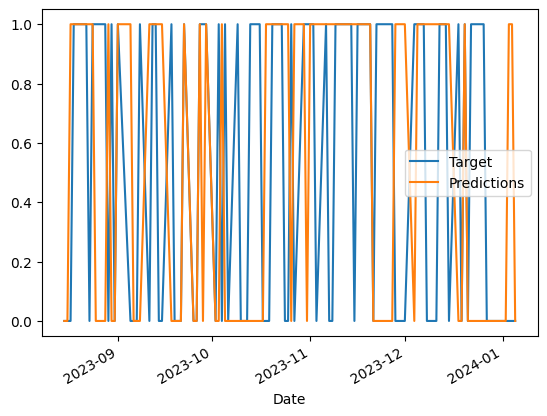

In [23]:
combined.plot()

## Building a backtesting system

In [24]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], y = train["Target"])    
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [32]:
def backtest(data, model, predictors, start = 1250, step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[:i].copy()
        test = data.iloc[i:i+step].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [33]:
predictions = backtest(tsla, model, predictors)

In [34]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5181818181818182

In [35]:
predictions['Target'].value_counts()/predictions.shape[0]

Target
1    0.521025
0    0.478975
Name: count, dtype: float64

## Additional Predictors 

In [49]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = tsla.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    tsla[ratio_column] = tsla["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    tsla[trend_column] = tsla.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [51]:
tsla = tsla.dropna(subset=tsla.columns[tsla.columns != "Tomorrow"])

In [52]:
tsla

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2016-12-20 00:00:00-05:00,13.536667,13.933333,13.500000,13.919333,70336500,13.846667,0,1.014726,2.0,1.033327,4.0,1.067165,28.0,0.993500,126.0,1.088084,519.0
2016-12-21 00:00:00-05:00,13.896667,14.148667,13.827333,13.846667,78114000,13.896667,1,0.997383,1.0,1.018846,3.0,1.061423,28.0,0.988743,125.0,1.081429,519.0
2016-12-22 00:00:00-05:00,13.881333,13.999333,13.766667,13.896667,46666500,14.222667,1,1.001802,1.0,1.011736,4.0,1.065058,28.0,0.992701,126.0,1.084352,520.0
2016-12-23 00:00:00-05:00,13.866667,14.230000,13.847333,14.222667,70057500,14.635333,1,1.011593,2.0,1.024678,4.0,1.088871,29.0,1.016451,126.0,1.108757,521.0
2016-12-27 00:00:00-05:00,14.325333,14.816667,14.294667,14.635333,88735500,14.649333,1,1.014300,2.0,1.037663,4.0,1.118989,29.0,1.046313,126.0,1.139826,522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 00:00:00-05:00,255.100006,255.190002,247.429993,248.479996,100615300,248.419998,0,0.990631,0.0,0.976538,2.0,1.048949,33.0,1.142567,137.0,1.182131,536.0
2024-01-02 00:00:00-05:00,250.080002,251.250000,244.410004,248.419998,104654200,238.449997,0,0.999879,0.0,0.979474,2.0,1.049554,33.0,1.139350,137.0,1.180629,536.0
2024-01-03 00:00:00-05:00,244.979996,245.679993,236.320007,238.449997,121082600,237.929993,0,0.979522,0.0,0.953823,1.0,1.009000,32.0,1.091126,136.0,1.132152,535.0


In [69]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=30, random_state=1)

In [70]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [71]:
predictions = backtest(tsla, model, new_predictors)

In [72]:
predictions["Predictions"].value_counts()

Predictions
0.0    496
1.0     26
Name: count, dtype: int64

In [73]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5384615384615384

In [74]:
predictions

,Target,Predictions
Date,,
2021-12-08 00:00:00-05:00,0,0.0
2021-12-09 00:00:00-05:00,1,0.0
2021-12-10 00:00:00-05:00,0,0.0
2021-12-13 00:00:00-05:00,0,0.0
2021-12-14 00:00:00-05:00,1,0.0
...,...,...
2023-12-29 00:00:00-05:00,0,0.0
2024-01-02 00:00:00-05:00,0,0.0
2024-01-03 00:00:00-05:00,0,0.0
